In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('BTC_historical_INR.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2021-01-22,2.821538e+06,3.095678e+06,2.650855e+06,3.021876e+06,77207272511
1,2021-01-23,3.020044e+06,3.054398e+06,2.883388e+06,2.935985e+06,48354737975
2,2021-01-24,2.935686e+06,3.016222e+06,2.848004e+06,2.956286e+06,48643830599
3,2021-01-25,2.955959e+06,3.186400e+06,2.937829e+06,2.963337e+06,59897054838
4,2021-01-26,2.962625e+06,3.002538e+06,2.841007e+06,2.981965e+06,60255421470


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1826 non-null   object 
 1   Open    1826 non-null   float64
 2   High    1826 non-null   float64
 3   Low     1826 non-null   float64
 4   Close   1826 non-null   float64
 5   Volume  1826 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 85.7+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1826 non-null   datetime64[ns]
 1   Open    1826 non-null   float64       
 2   High    1826 non-null   float64       
 3   Low     1826 non-null   float64       
 4   Close   1826 non-null   float64       
 5   Volume  1826 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 85.7 KB


In [7]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,1826,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03
mean,2023-07-23 12:00:00,5.039804e+06,5.136623e+06,4.937506e+06,5.042563e+06,3.679989e+10
min,2021-01-22 00:00:00,1.444964e+06,1.488064e+06,1.428186e+06,1.445421e+06,5.331173e+09
25%,2022-04-23 06:00:00,2.692679e+06,2.745664e+06,2.658367e+06,2.692692e+06,2.121163e+10
50%,2023-07-23 12:00:00,4.312186e+06,4.414959e+06,4.222469e+06,4.311866e+06,3.166726e+10
75%,2024-10-21 18:00:00,6.419617e+06,6.556239e+06,6.324098e+06,6.426821e+06,4.636039e+10
max,2026-01-21 00:00:00,1.142181e+07,1.155419e+07,1.127934e+07,1.142184e+07,3.509679e+11
std,NaN,2.715506e+06,2.753054e+06,2.675226e+06,2.716067e+06,2.275345e+10


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [9]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-22,2.821538e+06,3.095678e+06,2.650855e+06,3.021876e+06,77207272511
2021-01-23,3.020044e+06,3.054398e+06,2.883388e+06,2.935985e+06,48354737975
2021-01-24,2.935686e+06,3.016222e+06,2.848004e+06,2.956286e+06,48643830599
2021-01-25,2.955959e+06,3.186400e+06,2.937829e+06,2.963337e+06,59897054838
2021-01-26,2.962625e+06,3.002538e+06,2.841007e+06,2.981965e+06,60255421470


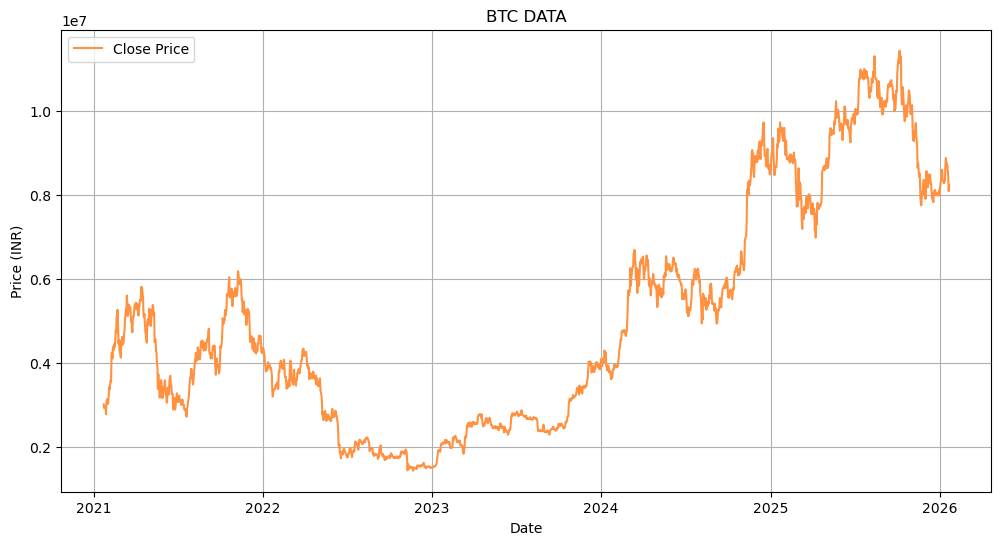

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Close'],label='Close Price',color='#FF9140')
plt.title('BTC DATA')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.savefig("close_graph_BTC.png", dpi=300, bbox_inches='tight')
plt.show()

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
decomposition = seasonal_decompose(df['Close'],model='multiplicative',period=30)

In [13]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

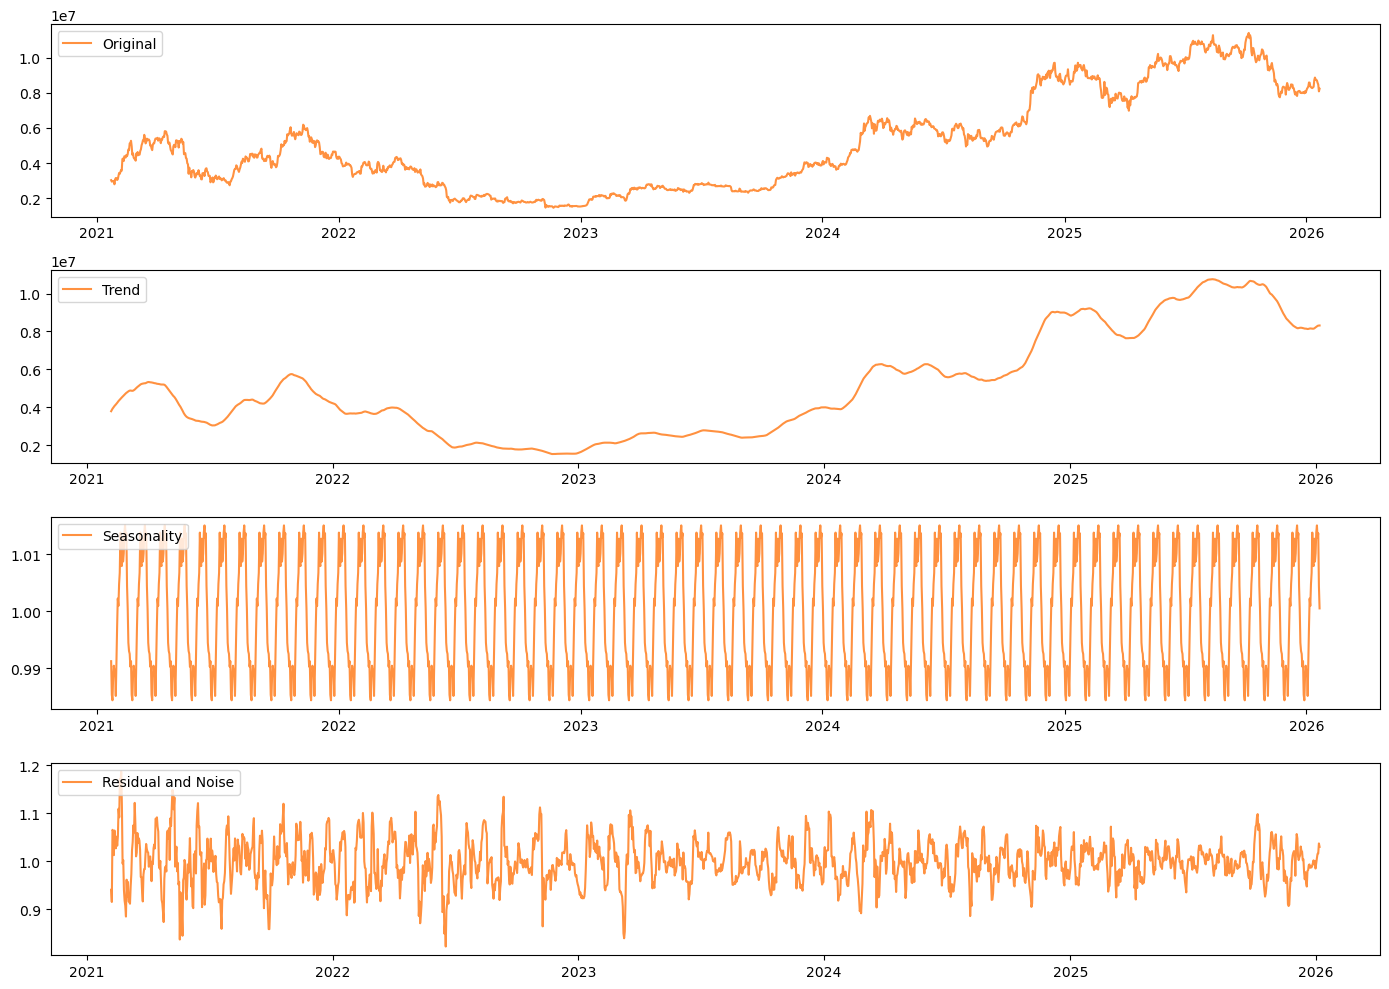

In [14]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(df['Close'],label='Original',color='#FF9140')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label='Trend',color='#FF9140')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonality,label='Seasonality',color='#FF9140')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label='Residual and Noise',color='#FF9140')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('stats_BTC.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
import numpy as np
import pandas as pd

def additive_or_multiplicative(series, window=30):
    # Rolling statistics
    rolling_mean = series.rolling(window).mean()
    rolling_var = series.rolling(window).var()
    
    # Drop NaNs properly
    df_mv = pd.concat([rolling_mean, rolling_var], axis=1).dropna()
    mean_var_corr = df_mv.iloc[:,0].corr(df_mv.iloc[:,1])
    
    # Variance stabilization test
    raw_var = rolling_var.mean()
    log_var = np.log(series).rolling(window).var().mean()
    
    variance_ratio = log_var / raw_var
    
    # Decision logic (finance-aware thresholds)
    if mean_var_corr > 0.2 and variance_ratio < 0.7:
        return "Multiplicative", mean_var_corr, variance_ratio
    else:
        return "Additive", mean_var_corr, variance_ratio

result, corr, ratio = additive_or_multiplicative(df['Close'])

print(result)
print("Mean-Variance Corr:", corr)
print("Variance Ratio:", ratio)

Multiplicative
Mean-Variance Corr: 0.3569879919693861
Variance Ratio: 4.4348718863894646e-14


In [16]:
from statsmodels.tsa.stattools import adfuller
# Perform the Augmented Dickey—Fuller
adf_test = adfuller(df['Close'])
print('ADF Test Results:')
adf_stats = round(adf_test[0],3)
p_value = round(adf_test[1],3)
print(f'ADF Statistic: {round(adf_test[0],3)}')
print(f'p—value: {round(adf_test[1],3)}')
print( 'Critical Values: ' )
for key, value in adf_test [4].items():
    print (f' {key}:{round(value,3)}')

if p_value < 0.05:
    print("DATA IS STATIONARY")
else:
    print('DATA IS NOT STATIONARY')


ADF Test Results:
ADF Statistic: -0.934
p—value: 0.777
Critical Values: 
 1%:-3.434
 5%:-2.863
 10%:-2.568
DATA IS NOT STATIONARY


In [17]:
# Performing ADF and KPSS tests
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value (%s): %.3f' % (key, value))

def kpss_test(series):
    result = kpss(series, regression='c')
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[3].items():
        print('Critical Value (%s): %.3f' % (key, value))

In [18]:
prices = df['Close']

In [19]:
adf_test(prices)

ADF Statistic: -0.9342035489878018
p-value: 0.7765001676530034
Critical Value (1%): -3.434
Critical Value (5%): -2.863
Critical Value (10%): -2.568


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


def run_arima_pipeline(
    df,
    diff_col='log_diff',
    price_col='Close_original',
    order=(0, 0, 0),
    test_size=30,
    title='ARIMA Model: Actual vs Predicted'
):
    """
    Fits ARIMA, forecasts prices, plots results, and computes RMSE.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame with DatetimeIndex
    diff_col : str
        Column name of stationary series (e.g., log-differenced)
    price_col : str
        Column name of original price series
    order : tuple
        ARIMA order (p, d, q)
    test_size : int
        Number of observations for test set
    title : str
        Plot title
    """

    # ----------------------------
    # 1. Prepare series
    # ----------------------------
    series = df[diff_col].dropna()

    train = series[:-test_size]
    test = series[-test_size:]

    # ----------------------------
    # 2. Fit ARIMA
    # ----------------------------
    model = ARIMA(train, order=order)
    model_fit = model.fit()

    # ----------------------------
    # 3. Forecast differences
    # ----------------------------
    pred_diff = model_fit.forecast(steps=test_size)

    # ----------------------------
    # 4. Inverse transform to prices
    # ----------------------------
    last_log_price = np.log(df[price_col].iloc[-test_size - 1])
    pred_log_prices = last_log_price + pred_diff.cumsum()
    pred_prices = np.exp(pred_log_prices)

    actual_prices = df[price_col].iloc[-test_size:]

    # ----------------------------
    # 5. RMSE calculations
    # ----------------------------
    rmse = np.sqrt(mean_squared_error(actual_prices, pred_prices))
    rmse_pct = (rmse / actual_prices.mean()) * 100

    # ----------------------------
    # 6. Plot
    # ----------------------------
    plt.figure(figsize=(10, 5))
    plt.plot(actual_prices.index, actual_prices, label='Actual Price')
    plt.plot(actual_prices.index, pred_prices,
             linestyle='--', color='red', label='Predicted Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ----------------------------
    # 7. Print results
    # ----------------------------
    print(f"ARIMA Order: {order}")
    print(f"RMSE: {rmse:.2f}")
    print(f"RMSE (%): {rmse_pct:.2f}%")

    return {
        "model": model_fit,
        "rmse": rmse,
        "rmse_pct": rmse_pct,
        "predictions": pred_prices
    }

In [42]:
results = run_arima_pipeline(
    df=df,
    diff_col='log_diff',
    price_col='Close_original',
    order=(0, 0, 1),
    test_size=30,
    title='ARIMA(0,1,1) – BTC Price Forecast'
)

KeyError: 'log_diff'